# Choosing Classifiers for Causal Inference

In [40]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import warnings

from utils import read_and_transform_data

warnings.filterwarnings('ignore')
plt.style.use('ggplot')


In [41]:
# Read and transform data
DATA_PATH = '/Users/gurkeinan/semester6/Causal-Inference/Project/code/data/processed_data.csv'
X, t, y = read_and_transform_data(DATA_PATH)
Xt = pd.concat([X, t], axis=1)

# ROC Curve for $Y \mid X, t$

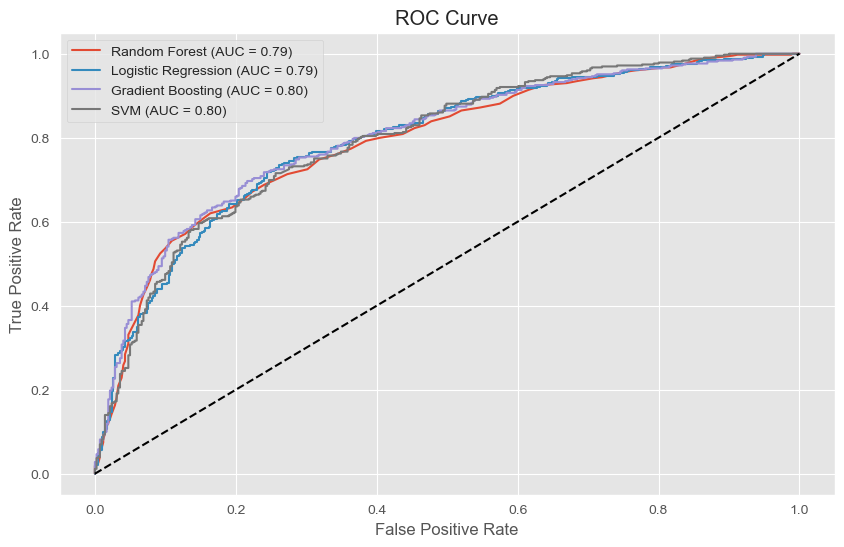

In [42]:
X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=0.2, random_state=42)

# Fit a Random Forest Classifier model to predict the target variable
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Fit a Logistic Regression model to predict the target variable
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

# Fit a Gradient Boosting Classifier model to predict the target variable
model_gb = GradientBoostingClassifier(random_state=42)   
model_gb.fit(X_train, y_train)

# Fit an SVM model to predict the target variable
model_svm = SVC(probability=True, random_state=42)
model_svm.fit(X_train, y_train)


# Make predictions for test data 
y_pred_rf = model_rf.predict_proba(X_test)[:, 1]
y_pred_lr = model_lr.predict_proba(X_test)[:, 1]
y_pred_gb = model_gb.predict_proba(X_test)[:, 1]
y_pred_svm = model_svm.predict_proba(X_test)[:, 1]

# Calculate the ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

# Calculate the ROC curve for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)

# Calculate the ROC curve for Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_gb)

# Calculate the ROC curve for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)

# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# ROC Curve $T \mid X$

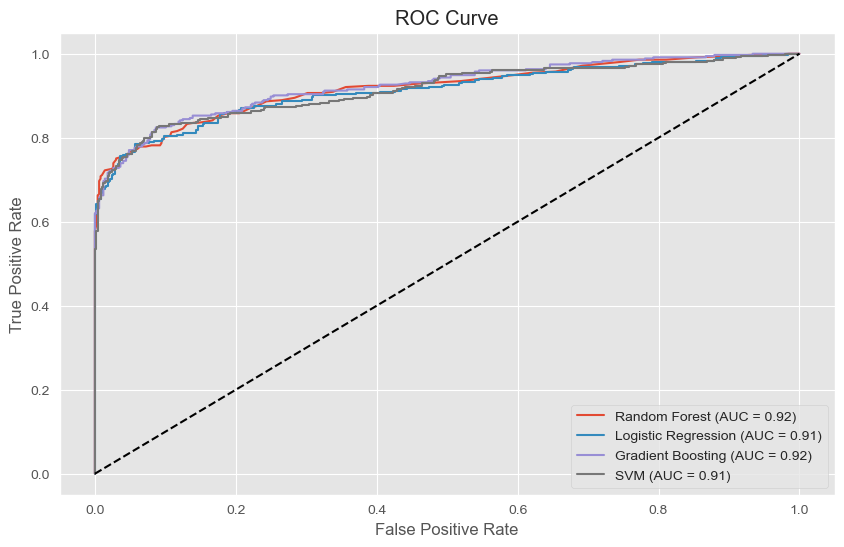

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, t, test_size=0.2, random_state=42)

# Fit a Random Forest Classifier model to predict the treatment variable
model_rf_t = RandomForestClassifier(random_state=42)
model_rf_t.fit(X_train, y_train)

# Fit a Logistic Regression model to predict the treatment variable
model_lr_t = LogisticRegression(random_state=42)
model_lr_t.fit(X_train, y_train)

# Fit a Gradient Boosting Classifier model to predict the treatment variable
model_gb_t = GradientBoostingClassifier(random_state=42)
model_gb_t.fit(X_train, y_train)

# Fit an SVM model to predict the treatment variable
model_svm_t = SVC(probability=True, random_state=42)
model_svm_t.fit(X_train, y_train)

# Make predictions for test data
y_pred_rf_t = model_rf_t.predict_proba(X_test)[:, 1]
y_pred_lr_t = model_lr_t.predict_proba(X_test)[:, 1]
y_pred_gb_t = model_gb_t.predict_proba(X_test)[:, 1]
y_pred_svm_t = model_svm_t.predict_proba(X_test)[:, 1]

# Calculate the ROC curve for Random Forest
fpr_rf_t, tpr_rf_t, _ = roc_curve(y_test, y_pred_rf_t)
roc_auc_rf_t = roc_auc_score(y_test, y_pred_rf_t)

# Calculate the ROC curve for Logistic Regression
fpr_lr_t, tpr_lr_t, _ = roc_curve(y_test, y_pred_lr_t)
roc_auc_lr_t = roc_auc_score(y_test, y_pred_lr_t)

# Calculate the ROC curve for Gradient Boosting
fpr_gb_t, tpr_gb_t, _ = roc_curve(y_test, y_pred_gb_t)
roc_auc_gb_t = roc_auc_score(y_test, y_pred_gb_t)

# Calculate the ROC curve for SVM
fpr_svm_t, tpr_svm_t, _ = roc_curve(y_test, y_pred_svm_t)
roc_auc_svm_t = roc_auc_score(y_test, y_pred_svm_t)

# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf_t, tpr_rf_t, label=f'Random Forest (AUC = {roc_auc_rf_t:.2f})')
plt.plot(fpr_lr_t, tpr_lr_t, label=f'Logistic Regression (AUC = {roc_auc_lr_t:.2f})')
plt.plot(fpr_gb_t, tpr_gb_t, label=f'Gradient Boosting (AUC = {roc_auc_gb_t:.2f})')
plt.plot(fpr_svm_t, tpr_svm_t, label=f'SVM (AUC = {roc_auc_svm_t:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Feature Importance

## Important Features for $Y \mid X, T$

In [44]:
X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=0.2, random_state=42)

# Fit a Random Forest Classifier model to predict the target variable
model_rf = GradientBoostingClassifier(random_state=42)
model_rf.fit(Xt, y)

feature_scores = pd.Series(model_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Scholarship holder_1                                         0.272795
Course_9500                                                  0.094340
Adult                                                        0.085372
Admission grade                                              0.065756
Gender_1                                                     0.064898
                                                               ...   
Application mode_5                                           0.000000
Application mode_2                                           0.000000
Previous qualification_Higher Education - Bachelor/Degree    0.000000
Father's occupation_Elementary Occupations                   0.000000
Application mode_27                                          0.000000
Length: 84, dtype: float64

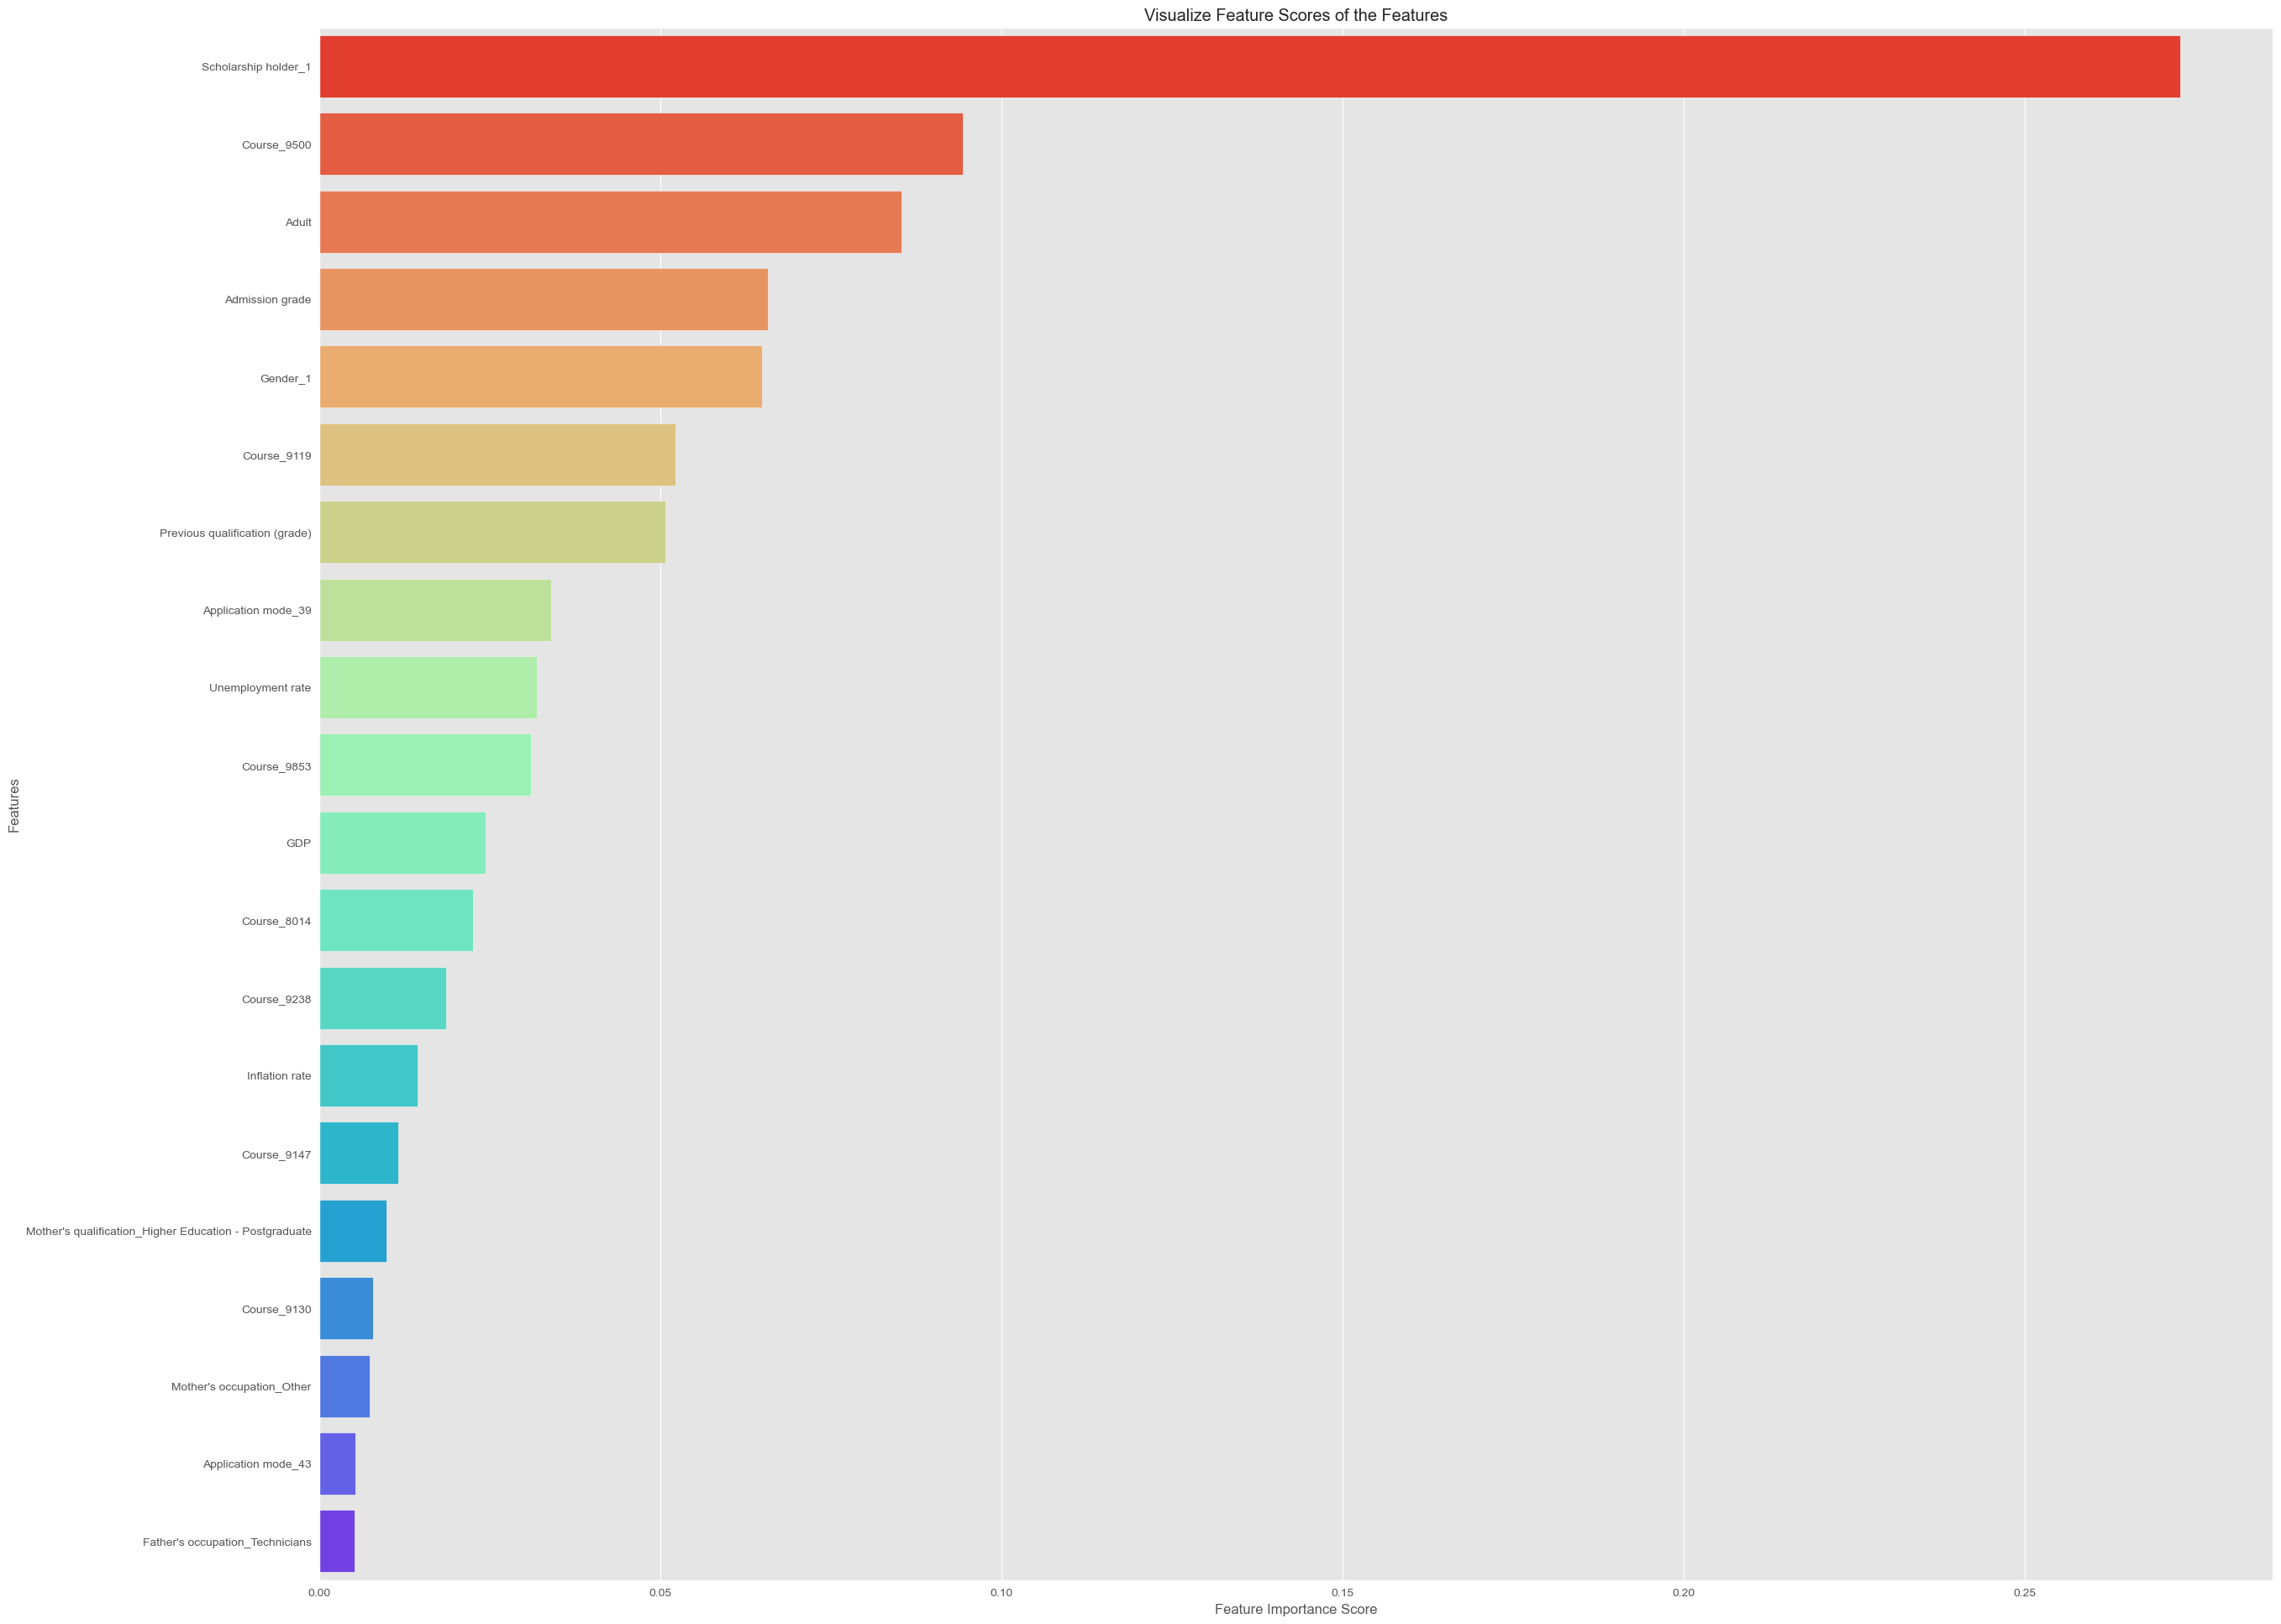

In [45]:
num_features_to_plot = 20
features_to_plot = feature_scores[:20]

palette = sns.color_palette("rainbow", num_features_to_plot)[::-1]  

f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=features_to_plot, y=features_to_plot.index, palette=palette)
ax.set_title("Visualize Feature Scores of the Features")
ax.set_yticklabels(features_to_plot.index)
ax.set_xlabel("Feature Importance Score")
ax.set_ylabel("Features")
plt.show()

## Important Features for $X | T$

In [46]:
# Split the data into training and testing sets
X_train_t, X_test_t, t_train, t_test = train_test_split(X, t, test_size=0.2, random_state=42)

# Fit a Random Forest Classifier model to predict the treatment variable
model_rf_t = GradientBoostingClassifier(random_state=42)
model_rf_t.fit(X_train_t, t_train)

# Calculate feature importances
feature_scores_t = pd.Series(model_rf_t.feature_importances_, index=X_train_t.columns).sort_values(ascending=False)

feature_scores_t

Application mode_39                                     0.481353
Previous qualification_Complete Secondary Education     0.132525
Application mode_43                                     0.075070
Daytime/evening attendance_1                            0.066809
Application order_1                                     0.026040
                                                          ...   
Marital status_6                                        0.000000
Application order_9                                     0.000000
Application order_5                                     0.000000
Application order_4                                     0.000000
Father's qualification_Other Specific Qualifications    0.000000
Length: 83, dtype: float64

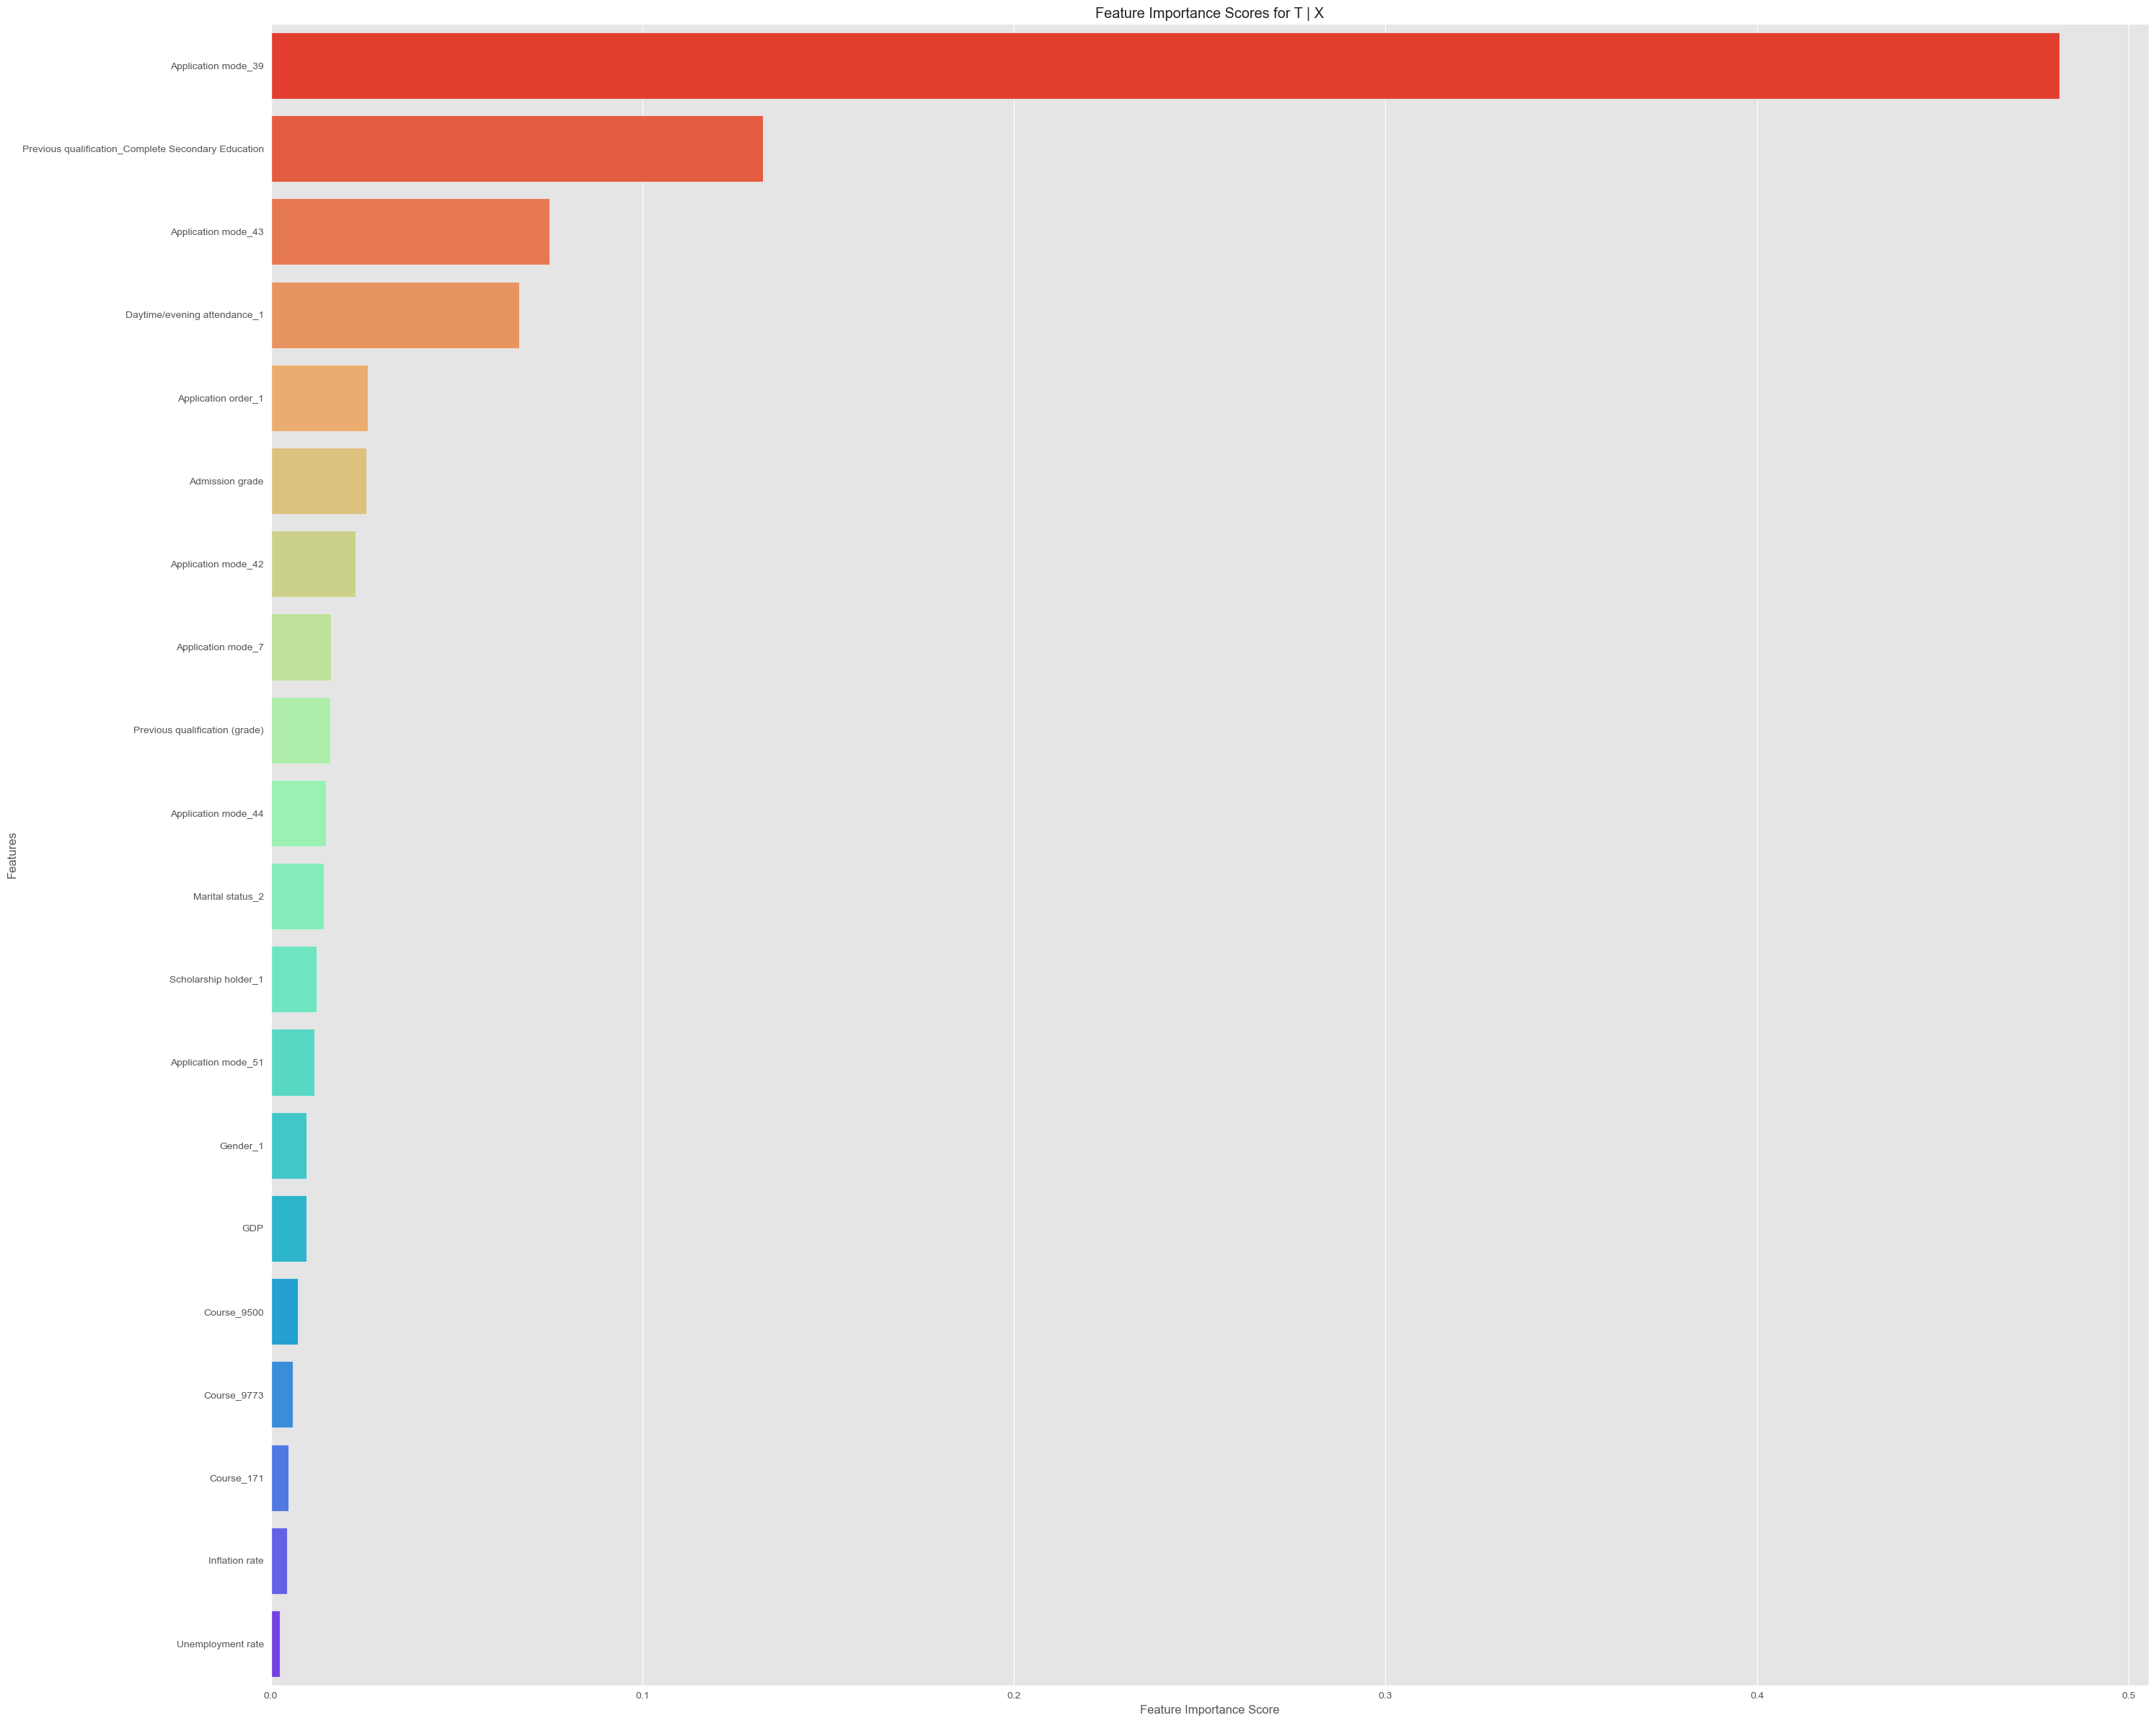

In [47]:
# Visualize feature importances
num_features_to_plot = 20
features_to_plot = feature_scores_t[:20]
palette = sns.color_palette("rainbow", num_features_to_plot)[::-1]  

plt.figure(figsize=(30, 24))
ax = sns.barplot(x=features_to_plot, y=features_to_plot.index, palette=palette)
ax.set_title("Feature Importance Scores for T | X")
ax.set_xlabel("Feature Importance Score")
ax.set_ylabel("Features")
plt.tight_layout()
plt.show()